# Diabetes Classifier

## Clean Data

In [ ]:
import pandas as pd
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

df = pd.read_csv("diabetes_prediction_dataset.csv")
df.tail()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0
99999,Female,57.0,0,0,current,22.43,6.6,90,0


In [220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [221]:
df.loc[df['gender'] == 'Other', 'gender' ]= df['gender'].mode()[0]
# mapping_gender = {'Male': 1,'Female' : 2}
# df['gender'] = df['gender'].map(mapping_gender)
# df['gender'] = df['gender'].astype('int64')

In [222]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [223]:
grouped = df.groupby('smoking_history').count()
grouped

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
smoking_history,,,,,,,,
No Info,35816,35816,35816,35816,35816,35816,35816,35816
current,9286,9286,9286,9286,9286,9286,9286,9286
ever,4004,4004,4004,4004,4004,4004,4004,4004
former,9352,9352,9352,9352,9352,9352,9352,9352
never,35095,35095,35095,35095,35095,35095,35095,35095
not current,6447,6447,6447,6447,6447,6447,6447,6447


In [224]:
# smoking_map = {
#     'No Info': 0,         
#     'current': 1,         
#     'ever': 2,            
#     'former': 2,          
#     'never': 3,           
#     'not current': 2      
# }

# df['smoking_history'] = df['smoking_history'].map(smoking_map).astype('int64')
# df.info()

### Dowload data after clean

In [225]:
df.to_csv('clean_dataset_diabetes.csv',index= False)

In [226]:
numeric_cols= ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
cateorical_cols= ['gender', 'hypertension', 'heart_disease', 'smoking_history', 'diabetes']

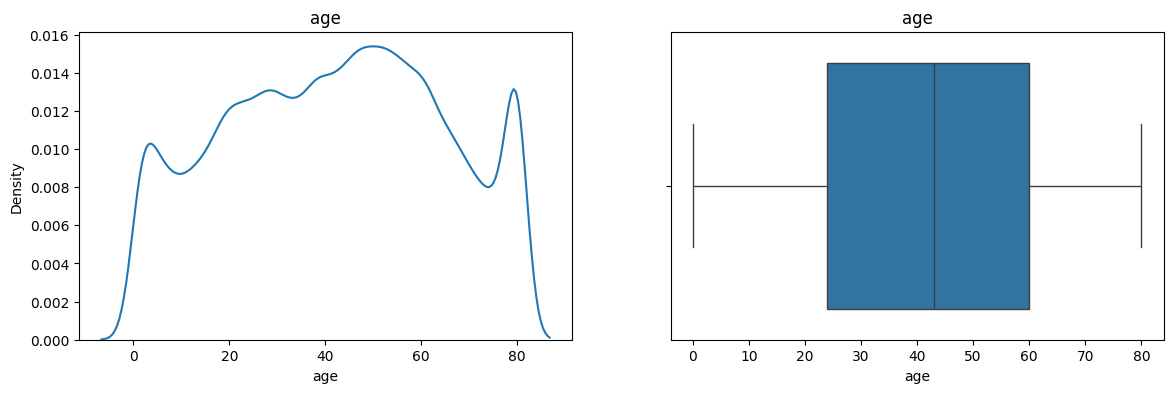

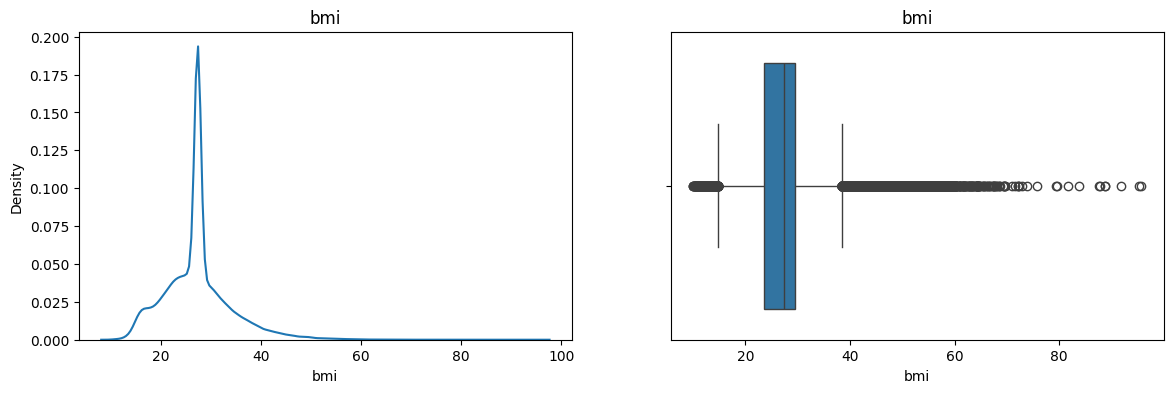

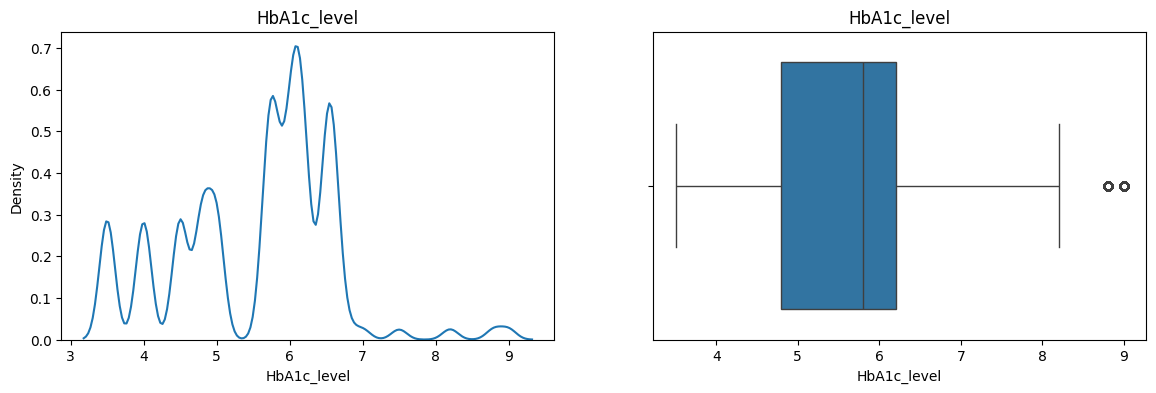

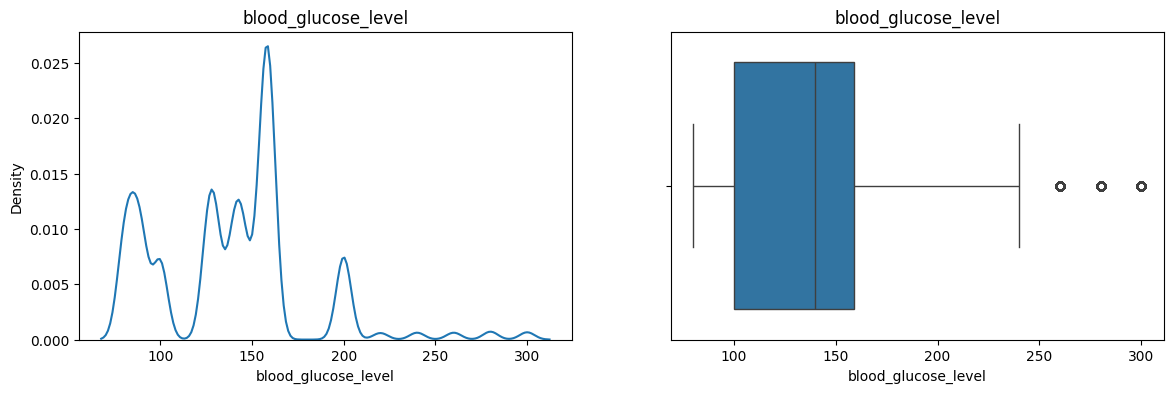

In [227]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
for col in numeric_cols:

    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.kdeplot(data=df, x = col)
    plt.title(col)

    plt.subplot(122)
    sns.boxplot(data=df, x = col, orient= 'h')
    plt.title(col)

    plt.show()

In [228]:
outlying_cols= ['bmi', 'HbA1c_level', 'blood_glucose_level']

for col in outlying_cols:
    q1, q3= np.percentile(df[col], [25, 75])
    iqr = q3 - q1
    
    low_lim = q1 - (1.5 * iqr)
    upp_lim = q3 + (1.5 * iqr)

    df[col]= np.where(
        df[col] > upp_lim,
        upp_lim,

        np.where(
            df[col] < low_lim,
            low_lim,
            df[col]
        )
    )

In [229]:
for col in cateorical_cols:
    print(f"{df[col].value_counts()}\n\n")

gender
Female    58570
Male      41430
Name: count, dtype: int64


hypertension
0    92515
1     7485
Name: count, dtype: int64


heart_disease
0    96058
1     3942
Name: count, dtype: int64


smoking_history
No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: count, dtype: int64


diabetes
0    91500
1     8500
Name: count, dtype: int64




In [230]:
df['diabetes'].value_counts()

diabetes
0    91500
1     8500
Name: count, dtype: int64

In [231]:
majority_data= df[ df['diabetes'] == 0 ]
minority_data= df[ df['diabetes'] == 1 ]

In [232]:
majority_data.shape, minority_data.shape

((91500, 9), (8500, 9))

In [233]:
# Upsample minority data
upsampled_minority_data = resample(minority_data, replace=True, n_samples=len(majority_data), random_state=42)

# Reset the index of the upsampled minority data
upsampled_minority_data = upsampled_minority_data.reset_index(drop=True)

# Reset index for majority data too (if necessary)
majority_data = majority_data.reset_index(drop=True)

# Combine the datasets into balanced_data
balanced_data = pd.concat([majority_data, upsampled_minority_data]).reset_index(drop=True)

balanced_data= balanced_data.sample(frac=1)

In [234]:
balanced_data['diabetes'].value_counts()

diabetes
1    91500
0    91500
Name: count, dtype: int64

In [235]:
balanced_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 183000 entries, 101394 to 35709
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               183000 non-null  object 
 1   age                  183000 non-null  float64
 2   hypertension         183000 non-null  int64  
 3   heart_disease        183000 non-null  int64  
 4   smoking_history      183000 non-null  object 
 5   bmi                  183000 non-null  float64
 6   HbA1c_level          183000 non-null  float64
 7   blood_glucose_level  183000 non-null  float64
 8   diabetes             183000 non-null  int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 14.0+ MB


In [236]:
balanced_data.shape

(183000, 9)

In [237]:
# feautures and labels
X= balanced_data.drop('diabetes', axis=1)
Y= balanced_data['diabetes']

In [238]:
X_train, X_test, y_train, y_test= train_test_split(X, Y, test_size=0.2)

In [239]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 183000 entries, 101394 to 35709
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               183000 non-null  object 
 1   age                  183000 non-null  float64
 2   hypertension         183000 non-null  int64  
 3   heart_disease        183000 non-null  int64  
 4   smoking_history      183000 non-null  object 
 5   bmi                  183000 non-null  float64
 6   HbA1c_level          183000 non-null  float64
 7   blood_glucose_level  183000 non-null  float64
dtypes: float64(4), int64(2), object(2)
memory usage: 12.6+ MB


In [240]:
# get the numeric and string features
numeric_features = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
categorical_features = X.select_dtypes(include=['object']).columns

In [241]:
numeric_features

['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']

In [242]:
# numeric transformer := power transformer
numeric_transformer= Pipeline([
    ('power_transformer', PowerTransformer())
])

In [243]:
string_transformer= Pipeline([
    ('one_hot_encoder', OneHotEncoder(sparse_output=False, drop='first'))
])

In [244]:
preprocessor= ColumnTransformer([
    ('numeric_transformer', numeric_transformer, numeric_features),
    ('string_transformer', string_transformer, categorical_features)
])

In [245]:
# model
model= LogisticRegression()

In [246]:
pipe= Pipeline([
    ('preprocessor', preprocessor),
    ('model', model)
])

In [247]:
# fit 
pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric_transformer',
                                                  Pipeline(steps=[('power_transformer',
                                                                   PowerTransformer())]),
                                                  ['age', 'bmi', 'HbA1c_level',
                                                   'blood_glucose_level']),
                                                 ('string_transformer',
                                                  Pipeline(steps=[('one_hot_encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse_output=False))]),
                                                  Index(['gender', 'smoking_history'], dtype='object'))])),
                ('model', LogisticRegression())])

In [248]:
# predict
y_preds= pipe.predict(X_test)

# evaluate

In [250]:
accuracy_score(y_test, y_preds)

0.8822677595628415

In [251]:
precision_score(y_test, y_preds)

np.float64(0.8805581193332971)

In [252]:
recall_score(y_test, y_preds)

np.float64(0.8849301615015277)

In [253]:
f1_score(y_test, y_preds)

np.float64(0.8827387269709092)

In [254]:
max_acc= 0
best_comps= 0

for i in range(1, 9):

    pipe= Pipeline([
        ('preprocessor', preprocessor),
        ('PCA', PCA(n_components=i)),
        ('model', model)
    ])

    pipe.fit(X_train, y_train)
    
    y_preds= pipe.predict(X_test)
    
    acc= accuracy_score(y_test, y_preds)

    if acc > max_acc:
        max_acc= acc
        best_comps= i

    print(f"{i} comps := {acc}")

print(f"\n\nBest comps: {best_comps}, Accuracy: {max_acc}")

1 comps := 0.8721311475409836
2 comps := 0.87724043715847
3 comps := 0.8782786885245901
4 comps := 0.8801912568306011
5 comps := 0.8798907103825137
6 comps := 0.8808196721311475
7 comps := 0.8812568306010929
8 comps := 0.8815027322404372


Best comps: 8, Accuracy: 0.8815027322404372
